In [1]:
import sqlite3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
%pip install pyarrow

In [4]:
all_data = pd.read_feather("C:/Users/ASUS/Downloads/Sales_data.ftr")

In [5]:
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
all_data = all_data.dropna(how='all')

In [8]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
all_data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [10]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [11]:
all_data = all_data.drop_duplicates()

In [12]:
all_data.shape

(185687, 6)

Analyzing Monthly sales

In [13]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [14]:
'04/19/19 08:46'.split(' ')[0].split('/')[0]

'04'

In [15]:
'04/19/19 08:46'.split('/')[0]

'04'

In [16]:
def return_month(x):
    return x.split('/')[0] 

In [17]:
all_data["Month"] = all_data['Order Date'].apply(return_month)

In [18]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [19]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [20]:
filter1 = all_data['Month']=='Order Date'

In [21]:
all_data[~filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [22]:
all_data = all_data[~filter1]

In [23]:
all_data['Month'].astype(int)

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Month, Length: 185686, dtype: int32

In [24]:
import warnings
from  warnings import filterwarnings
filterwarnings('ignore') 

In [25]:
all_data['Month'] = all_data['Month'].astype(int)

In [26]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [27]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [28]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [29]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [31]:
all_data.groupby(['Month'])['Sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

<Axes: xlabel='Month'>

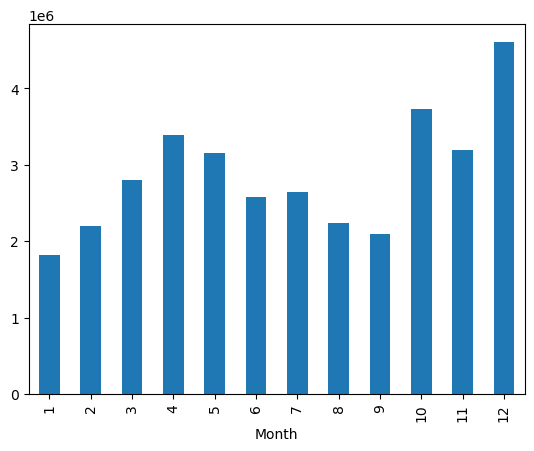

In [32]:
all_data.groupby(['Month'])['Sales'].sum().plot(kind='bar')

In [40]:
all_data['Purchase Address'][0].split(',')[1]

' Dallas'

In [41]:
def return_city(x):
    return x.split(',')[1]

In [43]:
all_data['Purchase Address'].apply(return_city)

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase Address, Length: 185686, dtype: object

In [44]:
all_data['City'] = all_data['Purchase Address'].apply(return_city)

In [46]:
all_data['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [48]:
pd.value_counts(all_data['City'])

City
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

<Axes: ylabel='count'>

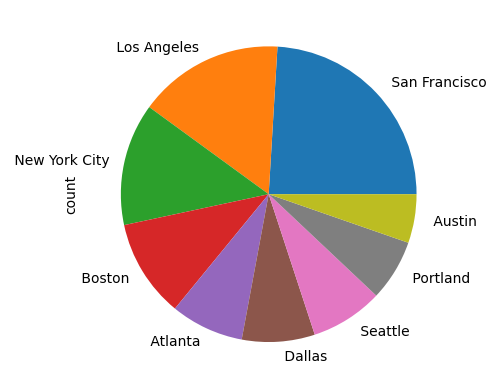

In [49]:
pd.value_counts(all_data['City']).plot(kind = 'pie')

<Axes: ylabel='count'>

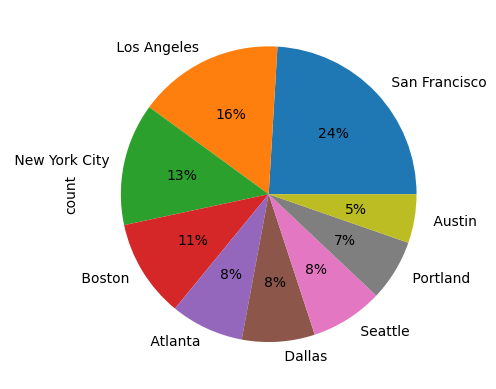

In [50]:
pd.value_counts(all_data['City']).plot(kind = 'pie', autopct= '%1.0f%%')

What product sold the most and why?

In [51]:
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [54]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum' ,'Price Each':'mean'})

In [55]:
count_df

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


In [58]:
count_df = count_df.reset_index()

In [65]:
products = count_df['Product'].values

[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

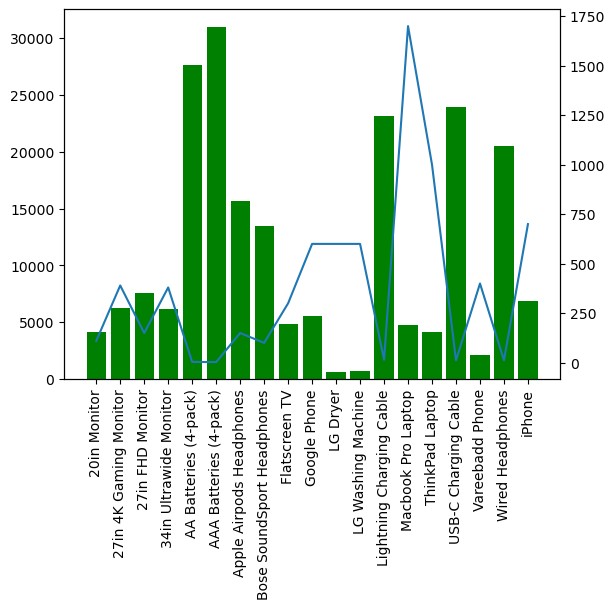

In [66]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(count_df['Product'] ,count_df['Quantity Ordered'],color ='g')
ax2.plot(count_df['Product'],count_df['Price Each'])

ax1.set_xticklabels(products,rotation='vertical',fontsize = 10)

Understanding the trend of most sold product

In [68]:
pd.crosstab(all_data['Month'],all_data['Product'])

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Month,,,,,,,,,,,,,,,,,,,
1,215,313,421,313,1037,1084,812,659,244,317,39,42,1069,235,218,1171,125,1004,381
2,245,424,471,415,1274,1320,1009,829,312,379,38,40,1393,276,275,1511,129,1179,438
3,323,478,605,520,1672,1645,1308,1181,358,463,49,64,1749,379,345,1766,174,1512,537
4,387,564,733,650,2062,1988,1507,1277,458,580,78,61,2197,452,390,2074,220,1888,691
5,338,541,688,543,1821,1888,1354,1165,399,479,76,64,1929,463,371,1879,185,1729,640
6,321,451,561,454,1540,1451,1152,969,366,391,43,55,1560,355,314,1531,155,1334,532
7,324,483,601,460,1555,1554,1212,1048,396,410,55,52,1690,368,319,1667,146,1434,501
8,258,437,484,378,1357,1340,998,871,331,359,46,48,1354,298,274,1339,141,1191,439
9,274,380,478,377,1314,1281,961,824,291,341,30,46,1324,287,249,1451,126,1173,396


<Axes: xlabel='Month'>

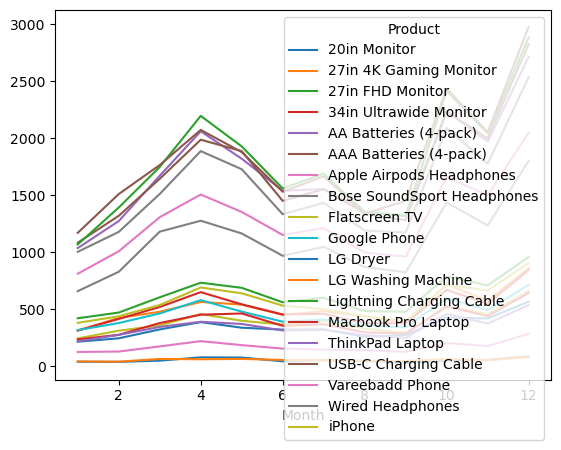

In [69]:
pd.crosstab(all_data['Month'],all_data['Product']).plot()

In [71]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [72]:
most_sold = all_data['Product'].value_counts()[0:5].index

In [73]:
all_data['Product'].isin(most_sold)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [74]:
all_data[all_data['Product'].isin(most_sold)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles


In [75]:
most_sold_df = all_data[all_data['Product'].isin(most_sold)]

In [77]:
most_sold_df.groupby(['Month','Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [79]:
pivot = most_sold_df.groupby(['Month','Product']).size().unstack()

In [80]:
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='Month'>

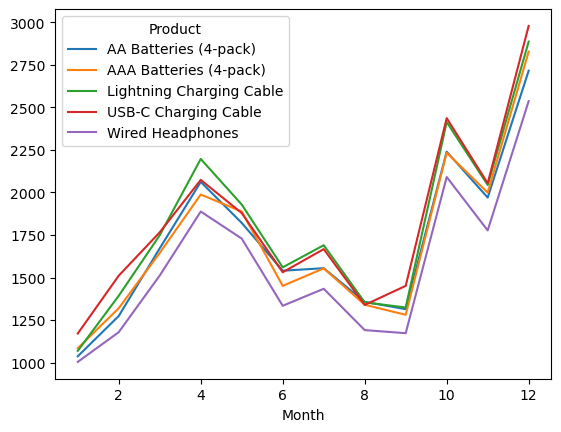

In [81]:
pivot.plot()

What products are sold together

In [82]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City'],
      dtype='object')

In [83]:
all_data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [84]:
all_data['Order ID'].duplicated(keep=False)

0         False
2         False
3          True
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185686, dtype: bool

In [86]:
df_duplicate = all_data[all_data['Order ID'].duplicated(keep=False)]

In [87]:
df_duplicate

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [92]:
df_products = df_duplicate.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index()

In [93]:
df_products

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [94]:
dup_products_df = df_duplicate.merge(df_products,how='left',on='Order ID')

In [95]:
dup_products_df

,Order ID,Product_x,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Product_y
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [97]:
no_dup = dup_products_df.drop_duplicates(subset=['Order ID'])

<Axes: ylabel='count'>

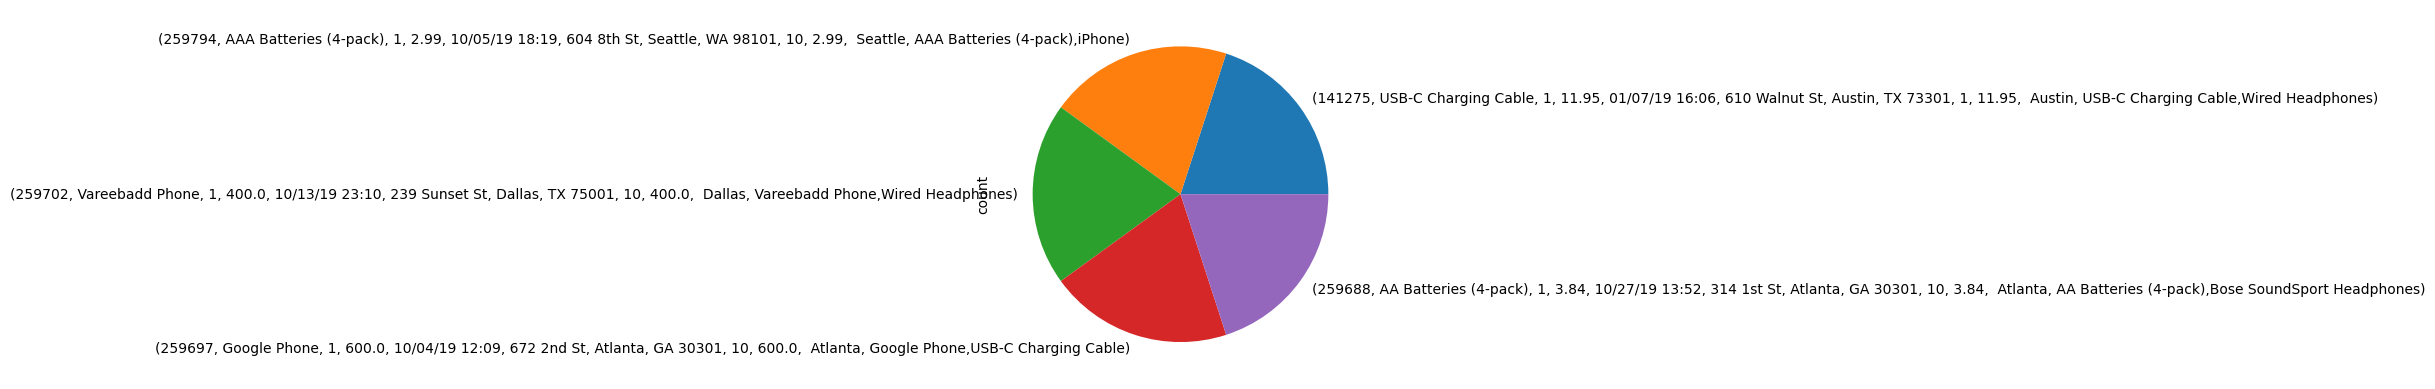

In [100]:
no_dup.value_counts()[0:5].plot.pie()